## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = ("Resources/Mouse_metadata.csv")
study_results_path = ("Resources/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
  
# Display the data table for preview
mouse_table.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
mouse_count=mouse_table["Mouse ID"].value_counts()
number_of_mice=len(mouse_count)
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
double_mice = mouse_table.loc[mouse_table.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
double_mouse_id=pd.DataFrame(double_mice)
double_mouse_id

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_table[mouse_table['Mouse ID'].isin(double_mice)==False]

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = mouse_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = mouse_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

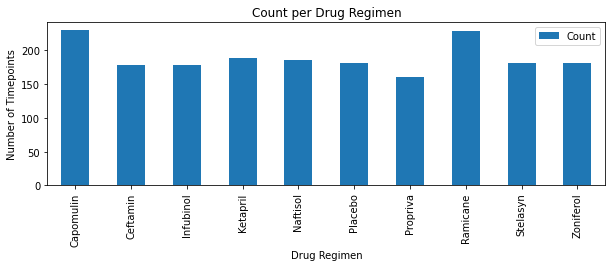

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grouped_df = pd.DataFrame(mouse_table.groupby(["Drug Regimen"]).count()).reset_index()
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")
regimen_datapoints.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.show()
plt.tight_layout()

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#List of drug regimen- Drug names
drug_regimens = summary_df.index.tolist()
drug_regimens


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [11]:
# List of drug timepoints
drug_count = (mouse_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Number of Timepoints')

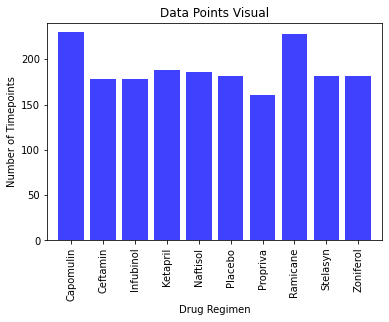

In [15]:
# Timepoint array
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(grouped_df))

#Creating Bar Chart
plt.bar(x_axis, users, color='blue', alpha=0.75, align='center')

#Setting Ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

#Setting X and Y Limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+10)

#Titles and Labels
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
